Nama : Nabila Ramadhanty

NIM : H071201006

MID Pengantar Data Science

CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style='darkgrid')


Informasi data

https://archive.ics.uci.edu/ml/datasets/Abalone

In [2]:
# read dataset
data = pd.read_csv('/content/abalone.data')
data.head(20)

## visualisasi ##
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Atribut Data
data.columns = [ "Sex", "Length","Diameter","Height","Whole weight","Shucked weight",
                "Viscera weight", "Shell weight","Rings",]

In [4]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [5]:
data = data.drop("Sex", axis=1)

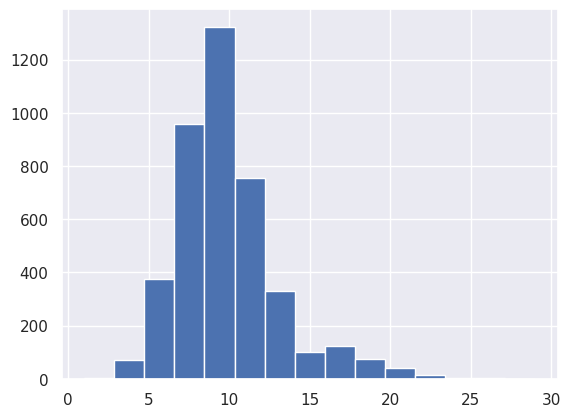

In [6]:
data["Rings"].hist(bins=15)
plt.show()

Create variabel X dan Y

In [7]:
X = data.drop("Rings", axis=1)
X = X.values
y = data["Rings"]
y = y.values

Split Data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=12345)

In [9]:
#function contusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def get_conf_matrix(y_test, y_pred_knn, title='Confusion Matriks'):
    confution_matriks = metrics.confusion_matrix(y_test, y_pred_knn)
    ax = sn.heatmap(confution_matriks, annot = True, fmt='g', cmap='BuGn')
    ax.set_xlabel('Prediksi')
    ax.xaxis.set_ticklabels(['Umur'])
    ax.set_ylabel('Aktual')
    ax.yaxis.set_ticklabels(['Umur'])
    ax.set_title(title)
    plt.show()
    acc = (confusion_matriks[0,0] + confution_matriks[1,1]) / sum(sum(confution_matriks))
    print("Confusion Matriks: ",round(acc*100,2),"%", sep='')
    print(get_conf_matrix(y_test, y_pred_knn))

1. KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:
knn_method = KNeighborsClassifier()
knn_method.fit(X_train, y_train) 
y_pred_knn = knn_method.predict(X_test)

score_knn = metrics.accuracy_score(y_pred_knn,y_test)

print('Akurasi metode KNN: ',round(score_knn,8), ' atau ', round(score_knn*100,2),'%', sep='')

Akurasi metode KNN: 0.24521531 atau 24.52%


In [16]:
k = 11
mean_acc = []
std_acc = []
for i in range(2,k):
  knn_method = KNeighborsClassifier(n_neighbors = i)
  knn_method.fit(X_train, y_train)
  y_pred_knn = knn_method.predict(X_test)
  score_knn = metrics.accuracy_score(y_pred_knn, y_test)
  mean_acc.append(score_knn)
  std_acc.append(np.std(y_pred_knn == y_test)/np.sqrt(y_pred_knn.shape[0]))

mean_acc

[0.20813397129186603,
 0.22009569377990432,
 0.22966507177033493,
 0.2452153110047847,
 0.2452153110047847,
 0.23564593301435408,
 0.23205741626794257,
 0.23684210526315788,
 0.2284688995215311]

In [ ]:
print("Nilai akurasi K-NN", round(np.array(mean_acc).max()*100,2), "% dengan nilai k = ", np.array(mean_acc).argmax()+1)

Nilai akurasi K-NN 24.52 % dengan nilai k =  4


In [ ]:
acc = (confution_matriks[0,0] + confution_matriks[1,1]) / sum(sum(confution_matriks))
print("Confution Matriks:", round(acc*100,2), "%", sep='')

Confution Matriks:0.6%


In [ ]:
confution_matriks = metrics.confusion_matrix(y_test, y_pred_knn)
confution_matriks

array([[ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 1,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 1,  6,  5, 12,  6,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  1,  8, 14, 19,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  1, 23, 27, 26,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  1,  9, 19, 39, 31, 10,  4,  2,  1,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  8, 29, 32, 26, 12,  1,  2,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  8, 18, 42, 36, 23,  3,  2,  1,  1,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  7,  5, 28, 27, 23,  8,  3,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  3, 16, 10,  9,  4,  1,  2,  1,  0,  0,  0,
         0,  1,  0,

<function matplotlib.pyplot.show(close=None, block=None)>

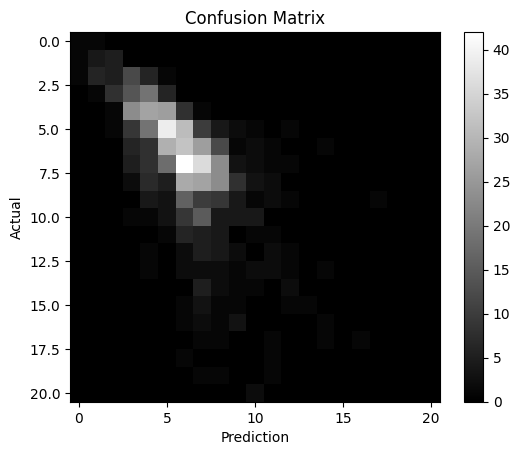

In [ ]:
plt.imshow(confution_matriks, cmap=plt.cm.gray)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show

2. Decision Treee

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_method = DecisionTreeClassifier()
tree_method.fit(X_train, y_train) 
y_pred = tree_method.predict(X_test)

accuracy = metrics.accuracy_score(tree_predic,y_test)

print('Akurasi metode Tree: ',round(accuracy,8), ' atau ', round(accuracy*100,2),'%', sep='')


Akurasi metode Tree: 0.19258373 atau 19.26%


<function matplotlib.pyplot.show(close=None, block=None)>

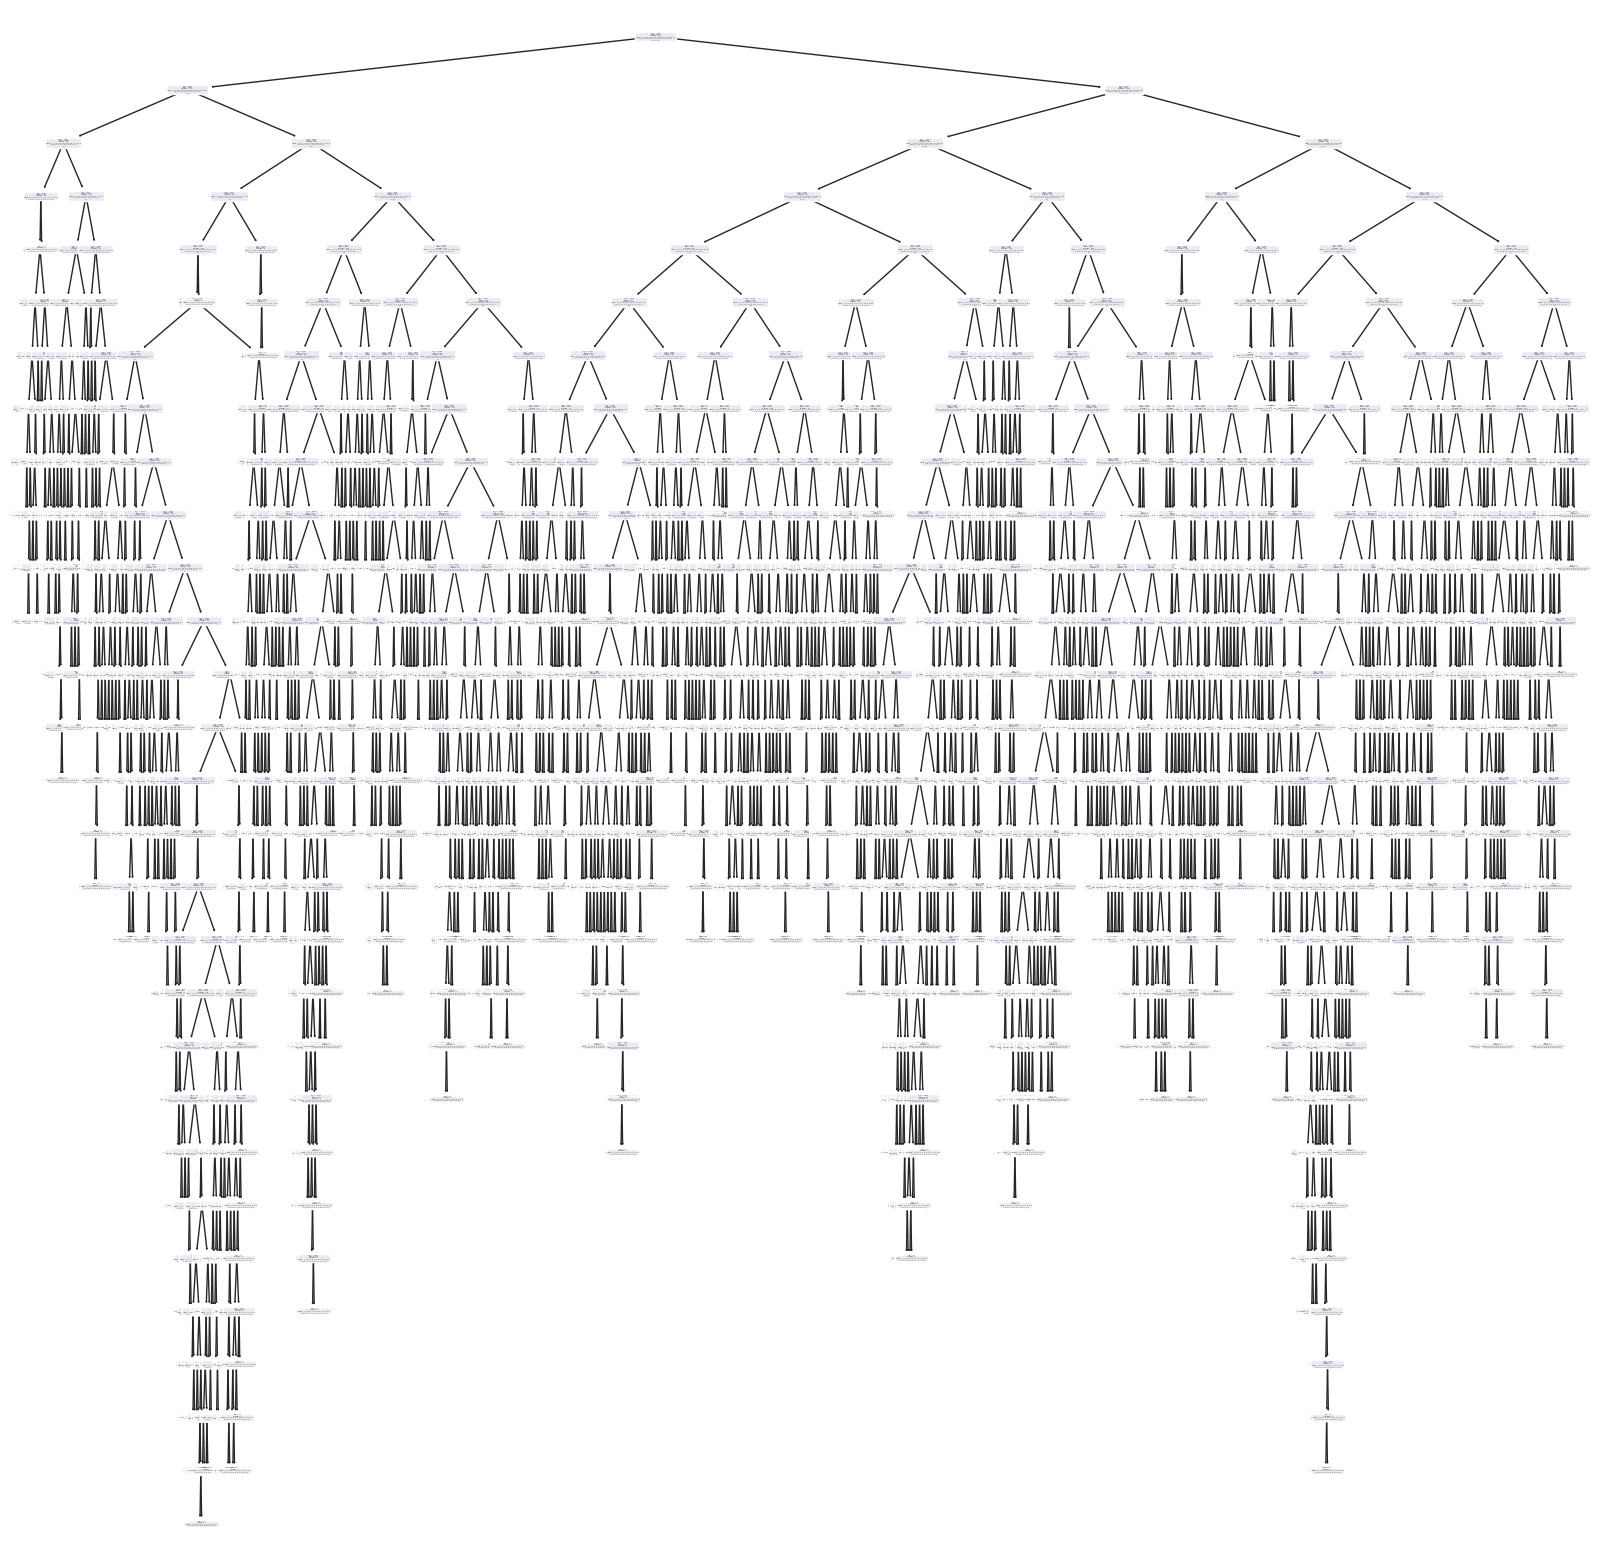

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(tree_method)
plt.show


3. Naive Bayes

In [ ]:
from sklearn import naive_bayes
bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(X_train, y_train) 
bayes_predic = bayes_method.predict(X_test)

accuracy = metrics.accuracy_score(bayes_predic,y_test)

print('Akurasi metode Bayes: ',round(accuracy,8), ' atau ', round(accuracy*100,2),'%', sep='')


Akurasi metode Bayes: 0.14114833 atau 14.11%


KESIMPULAN

Dari ketiga metode yang di gunakan, K_NN, Decision Tree dan Naive Bayes, metode dengan tingkat akurasi tertinggi dalam memprediksi umur dari Abalone adalah K-NN dengan tingkat akurasi 24.52 %

REGRESSION

In [ ]:
#read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data_olah = pd.read_csv('/content/Real-estate-valuation-data-set.csv')

Informasi data = https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [ ]:
data_olah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
data_olah.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
data_olah.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

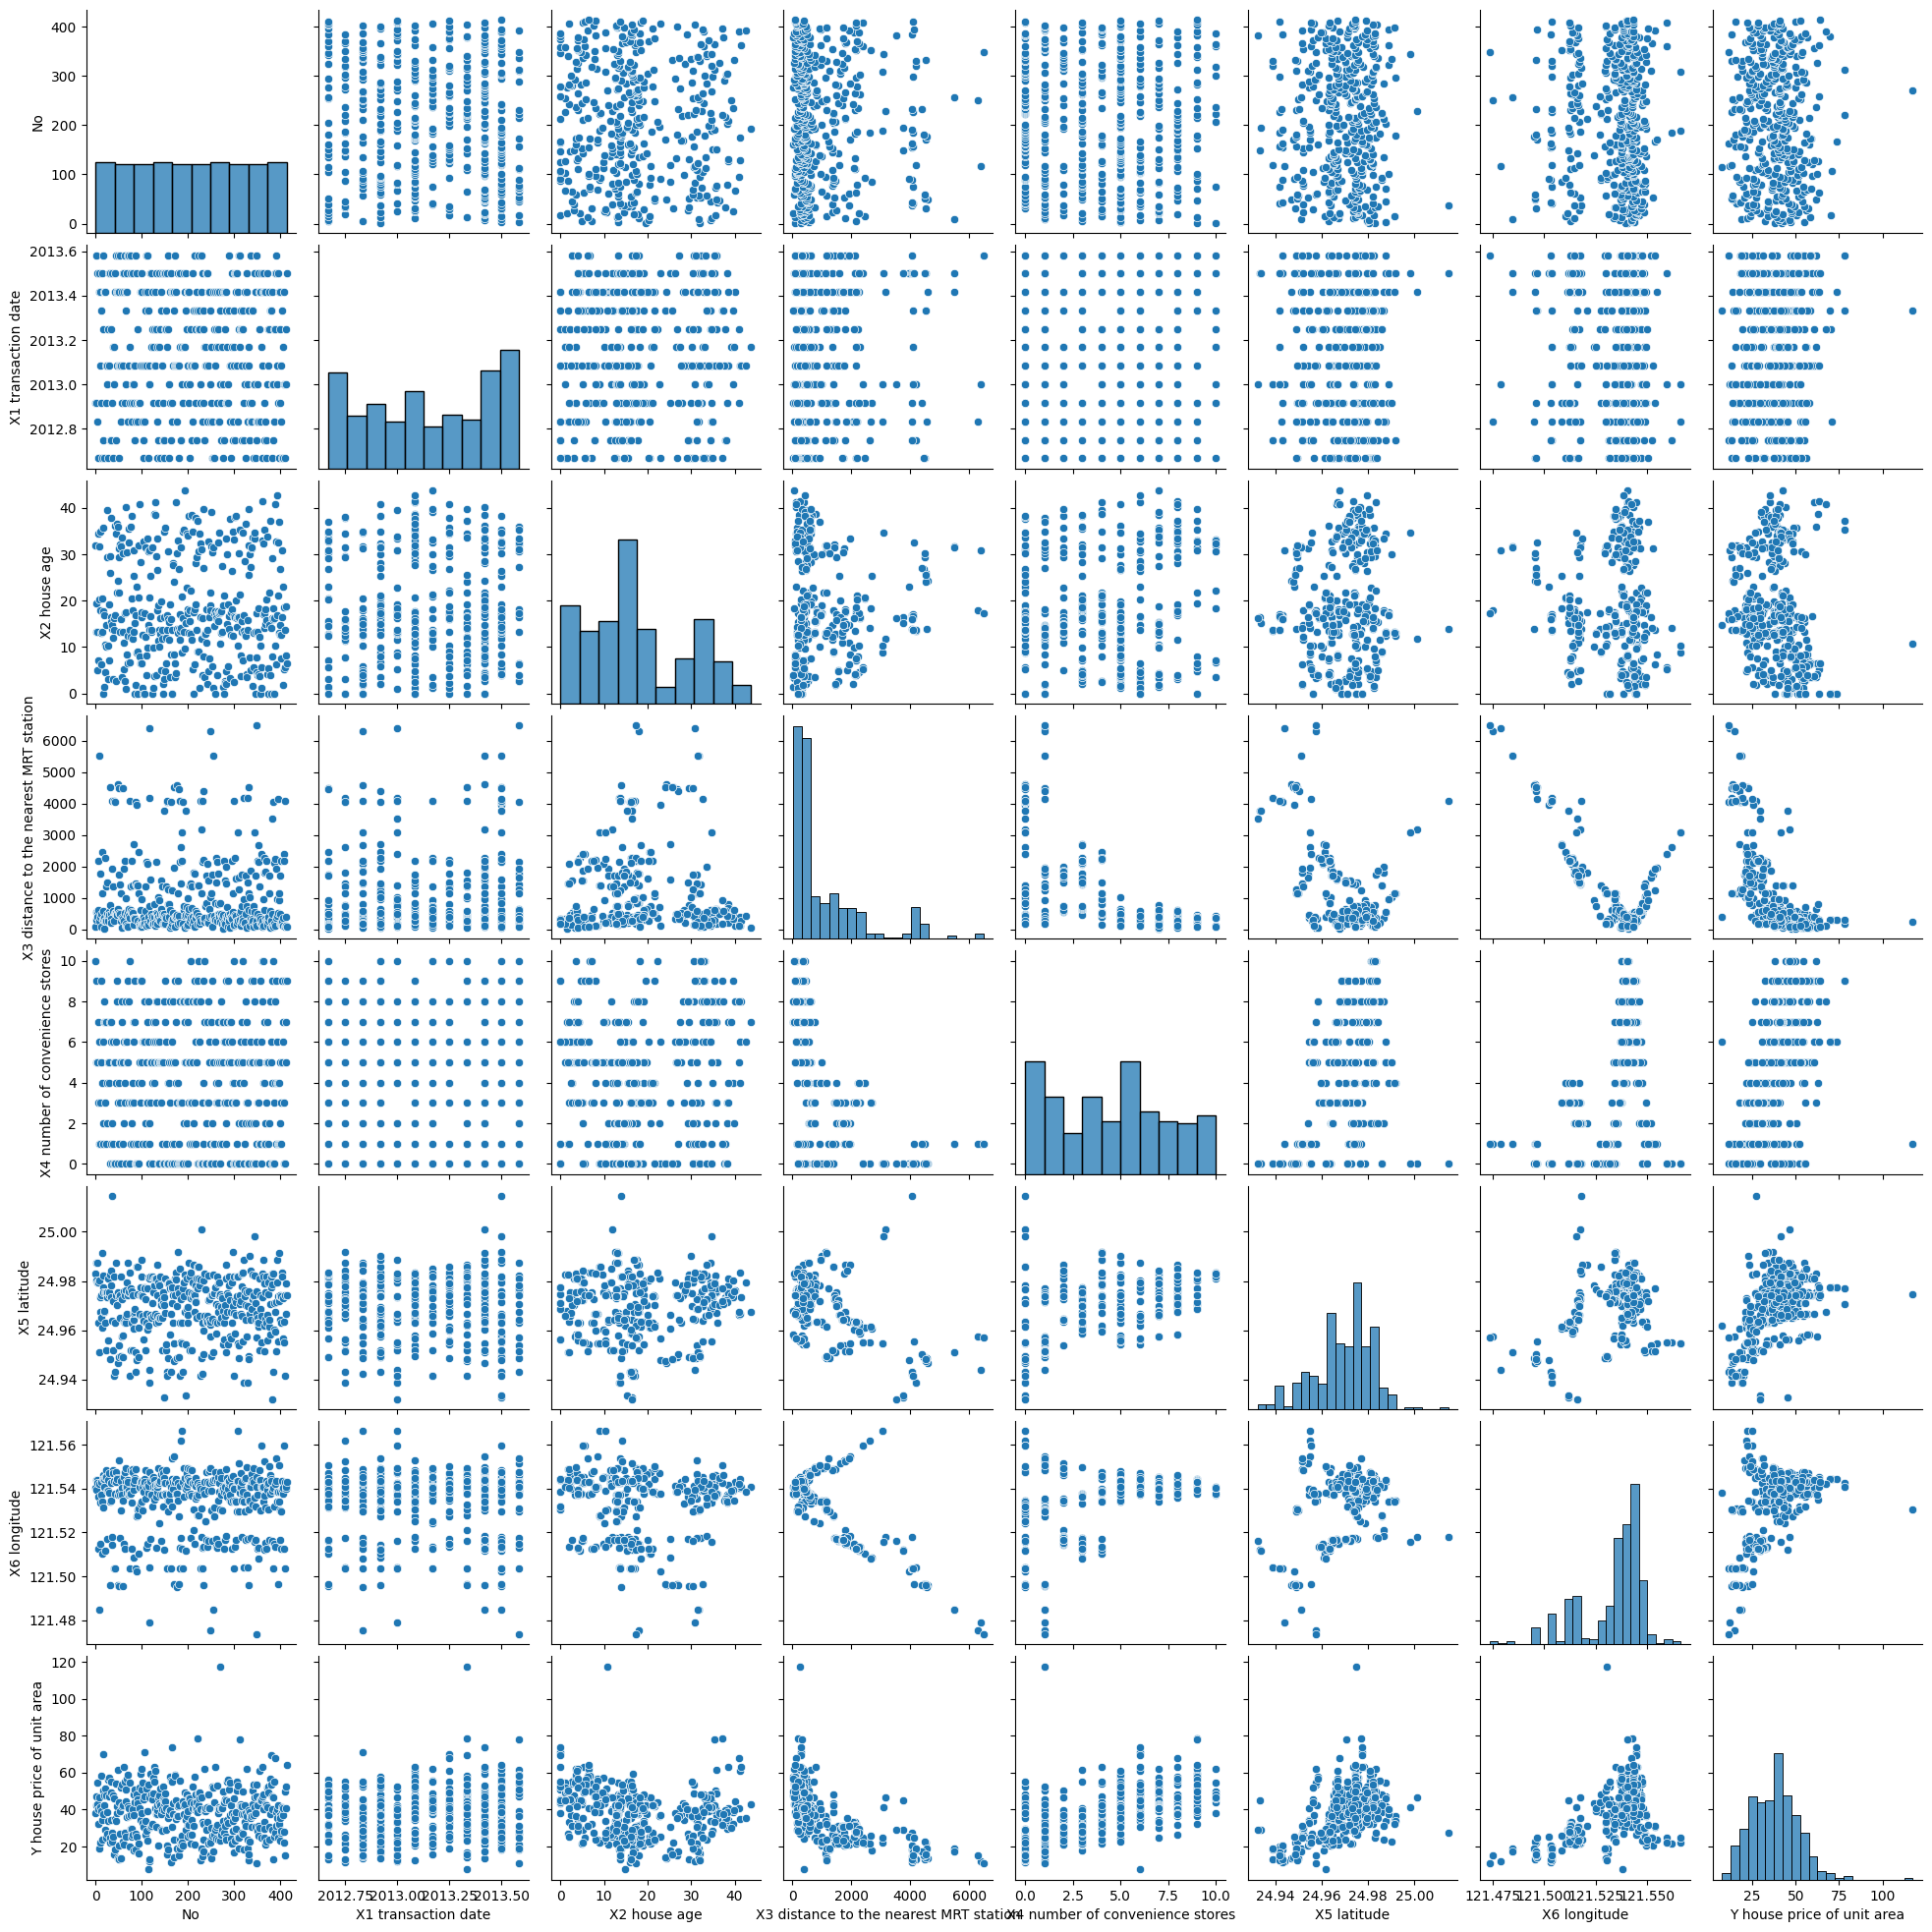

In [ ]:
sns.pairplot(data_olah)

In [ ]:
x = data_olah[['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']]
y = data_olah[['Y house price of unit area']]

In [ ]:
data_olah = data_olah.drop("No", axis=1)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[[-7.91953963e-16 -3.41393580e-14  2.32452946e-16 -2.77555756e-17
   1.21430643e-16 -1.67454856e-15 -3.01170552e-14  1.00000000e+00]]


In [ ]:
print(model.intercept_)

[7.26032567e-11]


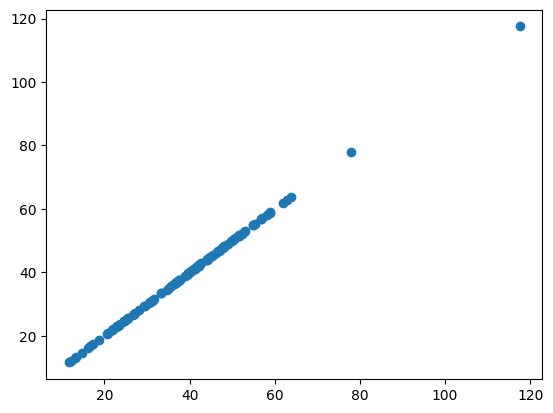

In [ ]:
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

(array([10., 13., 14., 15., 17., 14., 29.,  7.,  5.,  1.]),
 array([-1.98951966e-13, -1.54187774e-13, -1.09423581e-13, -6.46593890e-14,
        -1.98951966e-14,  2.48689958e-14,  6.96331881e-14,  1.14397380e-13,
         1.59161573e-13,  2.03925765e-13,  2.48689958e-13]),
 <BarContainer object of 10 artists>)

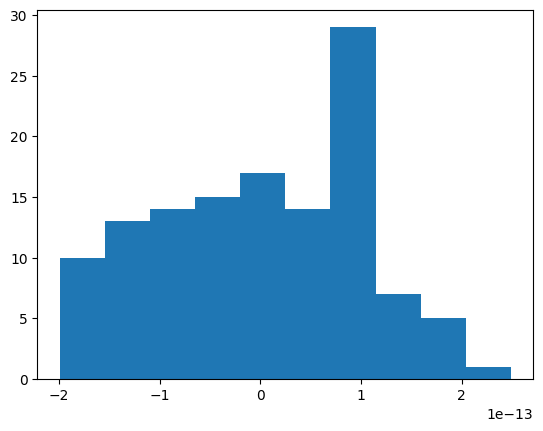

In [ ]:
plt.hist(y_test - predictions)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

8.748202162678353e-14

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

8.748202162678353e-14

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.0233912268017866e-13

CLUSTERING KMeans

In [ ]:
import pandas as pd
import numpy as np

Informasi dataset: https://archive.ics.uci.edu/ml/datasets/BuddyMove+Data+Set

In [ ]:
data_olah = pd.read_csv('/content/buddymove_holidayiq.csv')
data_olah.head() ## .tail()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [ ]:
X = data_olah.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans

## visualisasi ##
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## mencari kelompok terbaik ##
wcss = []
for i in range(1,11):
    method_kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    method_kmeans.fit(X)
    wcss.append(method_kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
sns.set_theme(style='darkgrid')

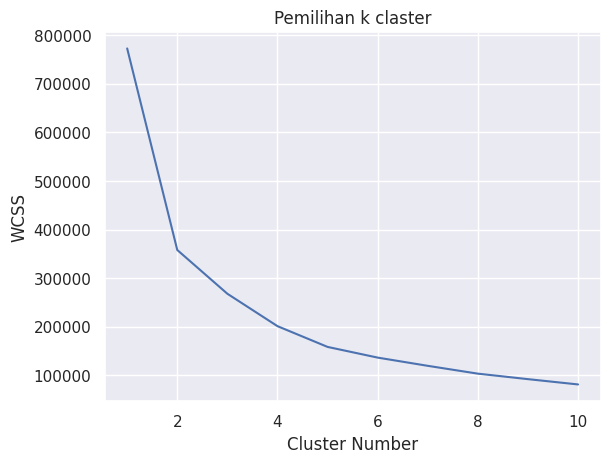

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Pemilihan k claster')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
method_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = method_kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 3, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 3, 0, 0, 1,
       3, 0, 1, 0, 0, 0, 3, 3, 1, 1, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0,
       2, 3, 4, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2, 3, 3, 0, 3, 4, 0, 1, 0, 3,
       4, 0, 2, 2, 1, 0, 0, 0, 0, 3, 0, 1, 0, 3, 0, 3, 1, 2, 2, 2, 2, 2,
       3, 0, 0, 4, 1, 0, 1, 0, 1, 4, 4, 1, 2, 4, 1, 2, 4, 2, 4, 2, 2, 3,
       4, 2, 2, 3, 2, 2, 2, 1, 4, 3, 4, 4, 2, 2, 3, 2, 4, 4, 3, 4, 4, 2,
       4, 0, 2, 2, 3, 2, 0, 2, 3, 2, 3, 1, 3, 4, 1, 1, 3, 2, 2, 1, 4, 4,
       2, 2, 2, 2, 3, 4, 2, 1, 0, 2, 0, 1, 2, 2, 2, 4, 3, 0, 2, 2, 1, 4,
       2, 4, 0, 4, 4, 2, 2], dtype=int32)

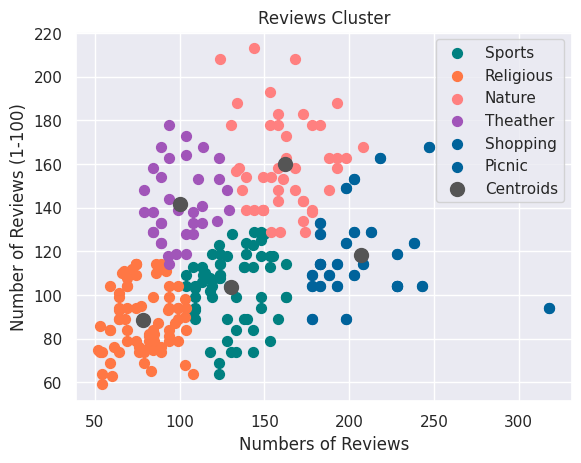

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = '#008080', label = 'Sports')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = '#FF7744', label = 'Religious')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = '#FF8080', label = 'Nature')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = '#A155B9', label = 'Theather')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#00639b', label = 'Shopping')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#00639b', label = 'Picnic')
plt.scatter(method_kmeans.cluster_centers_[:, 0], method_kmeans.cluster_centers_[:, 1], s = 100, c = '#555555', label = 'Centroids')
plt.title('Reviews Cluster')
plt.xlabel('Numbers of Reviews')
plt.ylabel('Number of Reviews (1-100)')
plt.legend()
plt.show()